# **Análisis de Datos – Práctica Guiada #1**

**Grado en Ingeniería Informática · Universidad Carlos III de Madrid**



In [1]:
# Por favor, incluid aquí los nombres de los miembros del grupo
# 
# Alba Reinders Sánchez, 100383444, grupo 83
# Alejandro Valverde Mahou, 100383383, grupo 83

## Introducción

*«Cada año, los alumnos son peores»*

Esta es una frase que en alguna ocasión podríamos haber escuchado en boca de algún profesor frustrado. Sin embargo, en esta asignatura vamos a evitar las falacias de autoridad e intentar verificar este hecho directamente, empleando los datos de los que disponemos.

En esta primera práctica guiada, vamos a realizar un análisis estadístico básico a partir de unos datos de los que disponemos, consistentes en calificaciones de una misma asignatura en los años 1996 y 1997.

## Carga de los datos

El primer paso antes de proceder consiste en cargar los datos, que están almacenados en el fichero `notas_96_97.csv`.

Para ello, vamos a emplear la librería **Pandas**, y en particular, nos será útil la función [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

**Nota 1:** Recuerda subir el archivo CSV a Google Colab para poder cargarlo.

**Nota 2:** ¿Los datos están cargados de forma adecuada? Si sospechas que no es así, tal vez sea bueno prestar atención al separador de columnas empleado en el fichero CSV.




In [2]:
import pandas as pd

### CÓDIGO A COMPLETAR (1 LÍNEA)
notas = pd.read_csv("notas_96_97.csv", sep=";")
###

Si los datos están bien cargados, a continuación podremos ver una previsualización de los mismos.

In [3]:
notas

,Year,Grade
0,1996,4.6
1,1996,8.1
2,1996,4.5
3,1996,3.7
4,1996,4.8
...,...,...
195,1997,4.7
196,1997,9.4
197,1997,7.7
198,1997,10.0


## Organización de datos

A la hora de trabajar con estos datos, tenemos fundamentalmente dos opciones:

1.   Considerar que disponemos de una serie de datos con dos variables.
2.   Considerar que disponemos de dos series de datos independientes (una por cada año).

Tomar una decisión ante esta disyuntiva puede resultar complicado. La opción (1) podría ser interesante, por ejemplo, si quisiéramos realizar una regresión de las notas con respecto al año. Sin embargo, dado que solo contamos con dos años distintos y la pregunta que nos planteábamos al principio consiste en tratar de dilucidar si los últimos son mejores que los primeros, parece más razonable optar por la alternativa (2).

En la clase práctica empleamos Excel para dividir los datos por columnas. Sin embargo, en esta ocasión no será necesario. 

El motivo es que Pandas dispone de la función [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), que nos permite agrupar datos en base a una determinada variable. El funcionamiento recuerda en cierto modo a la cláusula `GROUP BY` que podemos encontrar en SQL. 

A continuación, agruparemos los datos por año. Al hacerlo, el resto de operaciones que realicemos con este *dataframe* contará con esta agrupación.

In [4]:
### CÓDIGO A COMPLETAR (1 LÍNEA)
notas_by_year = notas.groupby(["Year"])
###

## Resumen estadístico

Una buena forma de comenzar a estudiar nuestros datos es dejar que ellos mismos nos hablen. Como los datos son bastante extensos (tenemos en total 200 muestras, cien para cada año), nos limitaremos a observar un resumen de los mismos.

Este resumen estadístico nos permitirá en general *orientarnos* sobre cómo están estructurados los datos, aunque no nos darán por lo general toda la información que necesitamos saber. No obstante, constituye un buen punto de partida.

Pandas nos permite realizar un resumen estadístico de forma sencilla: basta con emplear la función [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

A continuación, deberemos escribir el código necesario para realizar el cálculo de estos estadísticos.

In [5]:
### CÓDIGO A COMPLETAR (1 LÍNEA)
notas_by_year.describe()
###

Grade                                                
      count   mean       std  min    25%   50%    75%   max
Year                                                       
1996  100.0  5.336  1.972053  0.4  3.800  5.30  6.925  10.0
1997  100.0  6.831  1.860417  1.8  5.475  6.55  8.300  10.0

La media de la calificación para el año 1997 debería ser de 6.831. Si el valor coincide, es muy probable que los pasos anteriores sean correctos.

¿Por qué los resúmenes estadísticos son insuficientes? Al igual que si nos limitamos a leer la sinopsis de un libro o una película, perdemos casi toda la información disponible. 

El resumen nos permitirá conocer algunas características de los datos, pero a partir de un resumen, es imposible conocer la distribución original de los datos. La siguiente figura lo demuestra con bastante claridad:

![](https://bookdown.org/martinmontaneb/CienciaDeDatosParaCuriosos/Figuras/Capitulo%203/DinoSequentialSmaller.gif)

## Histogramas

Al igual que un resumen estadístico, un histograma solo nos proporciona una visión parcial de la información. Sin embargo, esta figura nos permite conocer algo mejor cómo se distribuyen los valores.

De nuevo, la elaboración de un histograma en Pandas es realmente sencilla: solo tenemos que emplear la función [`hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html).

Si el *dataframe* está agrupado, se mostrará un histograma por cada grupo (es decir, en este caso, por cada serie distinta).

A continuación, dibujaremos los histogramas de las dos series de valores.

Year
1996    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1997    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

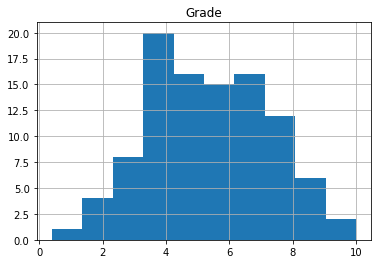

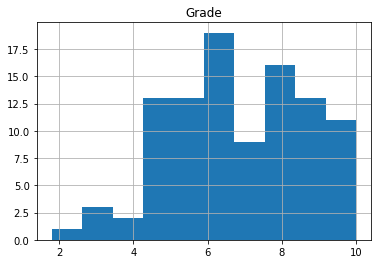

In [6]:
### CÓDIGO A COMPLETAR (1 LÍNEA)
notas_by_year.hist(bins=10)
###

## Gráficos de cajas

En cierto modo, un gráfico de cajas (*boxplot*) combina información presente en un resumen estadístico y en un histograma. A partir del gráfico podemos obtener algunos estadísticos, tales como la mediana, los cuartiles, el máximo y el mínimo y, en algunos casos, también la media. 

Además, el tamaño de las cajas nos ayuda a intuir la distribución de los datos, si bien de una forma menos detallada que la de un histograma.

Como ya es habitual, la generación en Pandas de este tipo de gráficos es bastante sencilla: basta con emplear la función [`boxplot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html).

A continuación, buscaremos dibujar estos gráficos de cajas. No obstante, en esta ocasión habrá que tener en cuenta un par de cuestiones:

*   Será necesario indicar la columna cuyos valores queremos incluir en el gráfico, empleando el argumento `column`.
*   Si queremos incluir la media en el gráfico, debemos especificar como argumento `showmeans=True`.



1996         AxesSubplot(0.1,0.15;0.363636x0.75)
1997    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

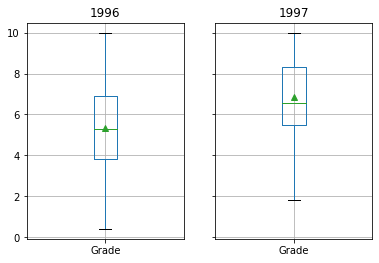

In [7]:
### CÓDIGO A COMPLETAR (1 LÍNEA)
notas_by_year.boxplot(column=["Grade"], showmeans=True)
###

## Contraste de hipótesis

Hasta ahora hemos empleado métodos de la *estadística descriptiva*, que se centran fundamentalmente en proporcionarnos información fácilmente digerible acerca de los datos de los que disponemos.

Los resultados anteriores nos permiten suponer, razonablemente, que los alumnos de 1997 no son peores que los de 1996. Esto podría, en principio, desmontar la afirmación del profesor frustado.

Sin embargo, ninguno de los resultados anteriores nos permite afirmar de forma categórica que los alumnos de 1997 son mejores que los de 1996. Todo parece indicar que es así: la distribución, la media, la mediana, etc.; pero para asegurarlo deberemos realizar un contraste de hipótesis.

Este tipo de técnicas pertenece a la *inferencia estadística*, y en general es un campo que aúna bastante complejidad, pues son numerosos los *tests* estadísticos que se pueden emplear y la prueba (o contraste) a utilizar variará en función de determinadas características de los datos, como su normalidad, heterocedasticidad, tamaño de muestra, etc.

Para saber qué prueba emplear, lo más sencillo es recurrir a algún manual estadístico que nos guíe mediante algún diagrama de flujo. No obstante, una característica de los contrastes de hipótesis es que siempre debemos definir dos hipótesis:

1.   La hipótesis nula (H0), que generalmente se suele asociar a la ausencia de diferencias entre las muestras.
2.   La hipótesis alternativa (H1), que generalmente se asocia a la diferencia significativa entre las muestras.

Durante el contraste de hipótesis, debemos definir un nivel de confianza. Generalmente se escoge 0.05, aunque en algunos casos se escoge 0.01 o 0.005 si se busca una confianza mayor.

Como resultado de la prueba, se obtiene un determinado *p*-valor, que se compara con dicho nivel de confianza. Si el *p*-valor es menor que el nivel de confianza, se acepta la hipótesis alternativa, mientras que en caso contrario se rechaza.

A continuación, proporcionamos un código para realizar un contraste de hipótesis con los datos de los que disponemos. Para ello, se ha recurrido a la librería Scipy. En concreto, se ha realizado un contraste *t*-Student, que exige normalidad a las muestras (algo que no podemos asegurar con total certeza, pero podemos asumir como razonable) e igualdad de varianzas (algo que comprobamos en el estudio empleando Excel).

In [8]:
# Cargamos la función para el test t-Student con dos muestras independientes.
from scipy.stats import ttest_ind

# Extraemos los valores de las notas de 1996 y 1997.
# Nótese que estamos realizando un filtrado (por año) y una proyección de la
# columna que contiene las notas.
notas1996 = notas[notas.Year == 1996].Grade.values
notas1997 = notas[notas.Year == 1997].Grade.values

# LOs valores que se imprimen son arrays de Numpy.
print(f"Las notas de 1996 son {notas1996}")
print(f"Las notas de 1997 son {notas1997}")

# Ejecutamos el contraste.
tset, pval = ttest_ind(notas1996, notas1997)
print(f"El p-valor obtenido es: {pval}")

Las notas de 1996 son [ 4.6  8.1  4.5  3.7  4.8  9.   3.6  3.8  5.4  5.4  6.6  5.4  7.3  6.
  7.1  4.1  6.8  4.4  6.1  4.5  7.3  1.8  3.9  6.   7.7  7.5  6.8  8.7
  5.5  3.9  7.   3.2  7.1  0.4  5.8  4.6  9.8  3.6  6.2  4.3  1.7  5.
  3.3  3.8  6.3  7.2  4.7  6.   7.8  6.9  5.2  7.5  7.4  7.8  4.   4.5
  1.4  3.2  3.5  2.5  1.5  2.8  5.9  3.9  4.9  5.6  8.3  3.5  3.6  6.8
  7.9  4.2  5.   3.7  4.9  3.7  8.2  4.   2.9  6.2  7.7  7.1  5.4  2.8
  2.8  6.   3.3 10.   4.4  7.   6.5  6.3  3.5  8.8  7.6  3.1  4.9  6.3
  5.6  5. ]
Las notas de 1997 son [ 5.   5.2  4.7  6.4  4.9  9.4 10.  10.   8.5  6.1  3.2  5.9  7.9  9.6
  8.2  6.2  3.1  7.8  6.3  5.7  4.5  7.5  6.2  4.8  7.3  6.2  5.4  5.1
  5.2  8.3  9.4  5.5  7.6  7.5  7.   7.7  8.8  6.1  8.4  4.9 10.   7.7
  8.7  4.1  7.2 10.   7.8  4.5  7.9  4.5  9.   5.6  4.6  9.1  8.2  5.7
  6.6  8.6  4.6  5.5  5.3  8.1  7.2  4.7  8.5  5.5  5.8  8.1  5.9  6.5
  9.1  6.3  6.5  8.7  7.1  1.8  6.3  8.8  6.   4.8  3.6  8.   6.4  6.4
  9.3  5.4 10.   6.   8

Asumiendo las suposiciones como ciertas (normalidad de datos e igualdad de varianzas), observamos que el resultado del contraste es un *p*-valor de 1.08E-7, que es sustancialmente menor que 0.05, o incluso que 0.005. Esto querría decir que, inequívocamente, las notas de 1997 son **significativamente mejores** que las de 1996.

## Conclusiones

Parece ser que nuestro profesor frustrado estaba equivocado. ¿O no?

Los datos de los que disponemos muestran claramente que las notas de 1997 son mejores que las de 1996. Sin embargo, esta, y no otra, es la única interpretación que podemos dar. Es decir:

*   No podemos asegurar que un grupo de estudiantes sea mejor o peor. Hay muchos elementos que podrían determinar si un grupo es mejor o peor que otro, más allá de la nota en una asignatura. Quizás los alumnos de 1996 tuvieran una mejor actitud en clase, o se comportaran con más educación.
*   Incluso si la nota de la asignatura de Programación fuera la única variable a tener en cuenta para medir la calidad del alumnado, podría haber factores externos no considerados. Tal vez el examen o las prácticas de 1997 fueran más fáciles.
*   Aun en igualdad de condiciones, jamás podríamos asegurar que los alumnos son mejores cada año, ya que solo disponemos datos de dos años. Serían necesarios datos con una mayor continuidad temporal para poder hacer una regresión y estudiar si realmente las notas mejoran con el paso del tiempo.

En definitiva, el análisis de datos involucra tener en cuenta estas cuestiones. Evitaremos las afirmaciones categóricas, salvo aquellas que estén debidamente contrastadas.

